In [1]:
import mne
import numpy as np
print(mne.__version__)
print(np.__version__)
import sys
sys.path.append('../src/utils/data_preprocessing')
import temp_utils as utils

1.6.0
1.26.3


In [2]:
file_path = r'D:\Research\EEG\EEG_DL_Classifier\src\data\EEG_DATASET\2\2.edf'
raw = utils.read_edf(file_path)
raw = utils.rename_edf(raw)
with mne.utils.use_log_level('WARNING'):
        raw.filter(1, 60, fir_design='firwin')

picks = utils.obtain_picks(raw)
info = utils.obtain_eeg_info(raw, picks)


Extracting EDF parameters from D:\Research\EEG\EEG_DL_Classifier\src\data\EEG_DATASET\2\2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3603999  =      0.000 ...  3603.999 secs...


In [3]:
utils.obtain_multi_topomap(raw, picks, info, '1', fig_size=128, is_energy=True, is_test=True)

Obtain topomap for 2: 100%|██████████| 10/10 [00:00<00:00, 17.36it/s]


In [4]:
from PIL import Image
import os

# 文件夹路径
main_path = r'D:\Research\EEG\EEG_DL_Classifier\tests'
eeg_file_name = '1'
folder_path = os.path.join(main_path, eeg_file_name)

output_path = r'D:\Research\EEG\EEG_DL_Classifier\tests\eeg.gif'


# 读取所有图像文件
images = []
for i in range(3600):
    file_name = f'{eeg_file_name}_{i}.png'  # 假设文件命名方式为 "0.png", "1.png", ..., "3599.png"
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        img = Image.open(file_path)
        images.append(img)




In [5]:
gif_path = output_path
images[0].save(gif_path, save_all=True, append_images=images[0:], optimize=False, duration=100, loop=1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 1651 samples (3.302 s)



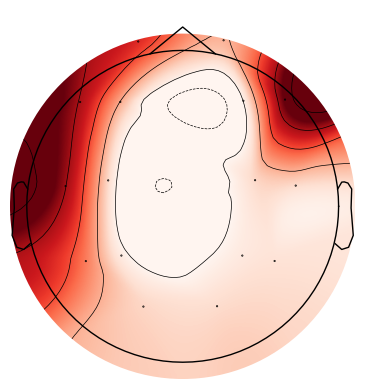

In [5]:
utils.obtain_single_topomap(raw, picks, info, 10, 20, is_energy=True)